In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/fredr/Dropbox/VT21/big_data/data.csv', index_col = 0)
labels = pd.read_csv('C:/Users/fredr/Dropbox/VT21/big_data/labels.csv')

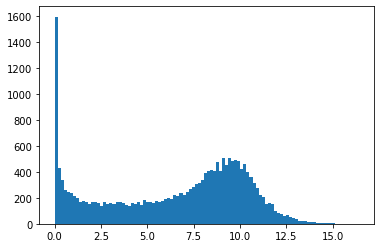

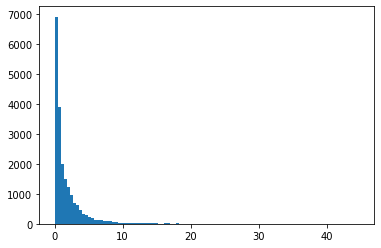

In [3]:
mean_arr = np.mean(data, 0)
var_arr = np.var(data, 0)
plt.hist(mean_arr, 100)
plt.show()
plt.hist(var_arr, 100)
plt.show()

In [4]:
print('There are %s constant features.' % len(np.argwhere(np.array(var_arr == 0))))

There are 267 constant features.


In [5]:
data_new = data.drop(data.columns[np.argwhere(np.array(var_arr == 0)).flatten()], axis = 1)
mean_arr = np.mean(data_new, 0)
var_arr = np.var(data_new, 0)
min_var = 2
data_new.drop(data_new.columns[np.argwhere(np.array(var_arr < min_var)).flatten()], axis = 1, inplace = True)
mean_arr = np.mean(data_new, 0)
var_arr = np.var(data_new, 0)
print(data_new.shape)

(801, 5579)


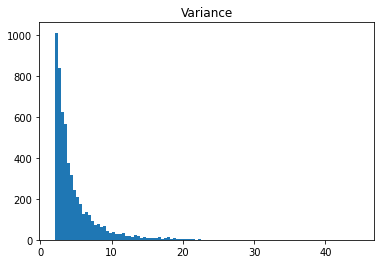

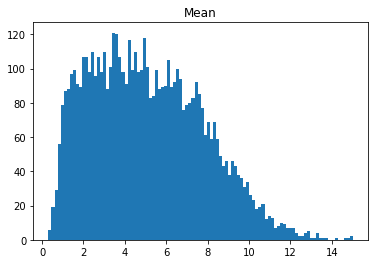

In [6]:
plt.hist(var_arr, 100)
plt.title('Variance')
plt.show()
plt.hist(mean_arr, 100)
plt.title('Mean')
plt.show()

In [53]:
data_new_standardized = (data_new - mean_arr)/(var_arr ** (1/2))
n = data_new_standardized.shape[0]

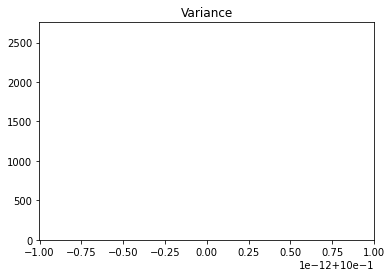

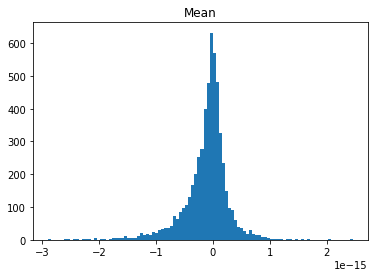

In [54]:
mean_arr = np.mean(data_new_standardized, 0)
var_arr = np.var(data_new_standardized, 0)
plt.hist(var_arr)
plt.title('Variance')
plt.show()
plt.hist(mean_arr, 100)
plt.title('Mean')
plt.show()

## T3 - PCA ##

In [55]:
cov = 1/(n-1)*np.matmul(np.transpose(data_new_standardized),data_new_standardized)

<ipython-input-55-9faf89e2e5fe>:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  cov = 1/(n-1)*np.matmul(np.transpose(data_new_standardized),data_new_standardized)


                0         1         2         3         4         5     \
gene_18     1.001250  0.039185 -0.419359  0.092758 -0.184905  0.583433   
gene_21     0.039185  1.001250 -0.000631  0.031380 -0.107959 -0.020880   
gene_26    -0.419359 -0.000631  1.001250  0.030040  0.135950 -0.444200   
gene_28     0.092758  0.031380  0.030040  1.001250  0.207336 -0.232517   
gene_29    -0.184905 -0.107959  0.135950  0.207336  1.001250 -0.491355   
...              ...       ...       ...       ...       ...       ...   
gene_20500 -0.040221 -0.058797 -0.006441  0.486572  0.329574 -0.278548   
gene_20504  0.047974  0.217351  0.145365  0.317551 -0.070313 -0.134449   
gene_20514  0.205650  0.098828 -0.059676  0.128169 -0.315599  0.376599   
gene_20524 -0.251016  0.074538  0.303343  0.328993  0.361375 -0.584229   
gene_20529 -0.064044  0.020654  0.082563  0.230237  0.231495 -0.302788   

                6         7         8         9     ...      5569      5570  \
gene_18    -0.203306 -0.297315  

In [56]:
eigenvalues = np.linalg.eig(cov)

In [ ]:
w, v = eigenvalues

idx = w.argsort()[::-1]   
w = w[idx]
v = v[:,idx]

In [104]:
best_index = np.argmax(w) 
print(f'The  largest eigenvalue is: {w[best_index]}')
print(f'the first 4 eigenvalues:\n {w[0]}\n {w[1]}\n{w[2]}\n {w[3]} \n')
r1 = v[:,best_index]
print(f'the egienvector of the largest eigenvalue is {r1}')


nr_pcs = 4
PC = np.zeros((nr_pcs,n),dtype=int)
for i in range(nr_pcs):
    PC[i] = np.matmul(data_new_standardized, v[:,i])


The  largest eigenvalue is: (855.3647878596865+0j)
the first 4 eigenvalues:
 (855.3647878596865+0j)
 (620.2481013487684+0j)
(511.59166714622023+0j)
 (395.5613702277001+0j) 

the egienvector of the largest eigenvalue is [-0.03004366+0.j -0.00166835+0.j  0.0110903 +0.j ... -0.00832641+0.j
  0.01017265+0.j  0.0021567 +0.j]


C:\Users\fredr\Miniconda3\envs\big_data\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


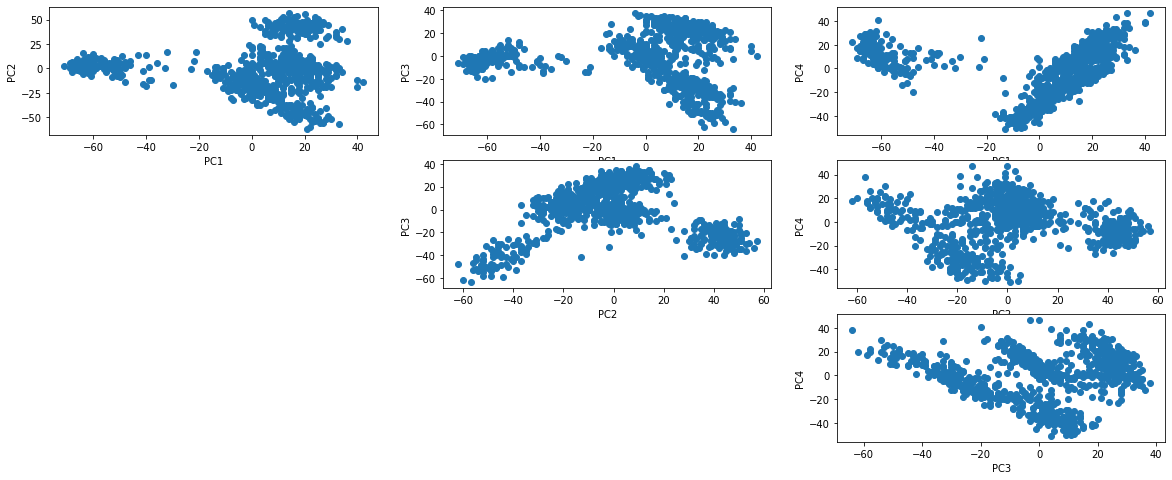

Text(0, 0.5, 'PC1000')

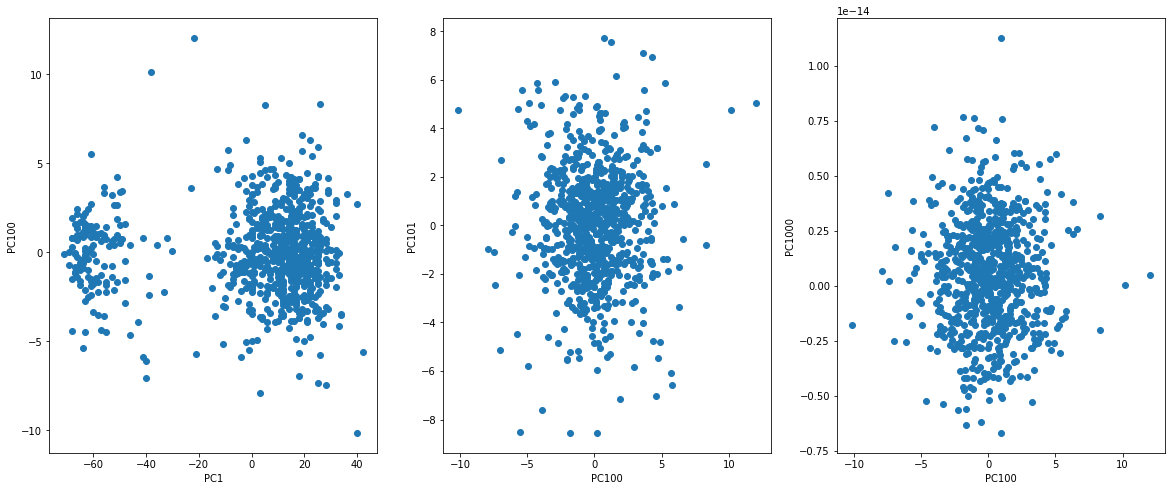

In [84]:
plt.rcParams["figure.figsize"]=20,8

plt.subplot(3,3,1)
plt.scatter(PC[0],PC[1])
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(3,3,2)
plt.scatter(PC[0],PC[2])
plt.xlabel('PC1')
plt.ylabel('PC3')

plt.subplot(3,3,3)
plt.scatter(PC[0],PC[3])
plt.xlabel('PC1')
plt.ylabel('PC4')

plt.subplot(3,3,5)
plt.scatter(PC[1],PC[2])
plt.xlabel('PC2')
plt.ylabel('PC3')

plt.subplot(3,3,6)
plt.scatter(PC[1],PC[3])
plt.xlabel('PC2')
plt.ylabel('PC4')


plt.subplot(3,3,9)
plt.scatter(PC[2],PC[3])
plt.xlabel('PC3')
plt.ylabel('PC4')

plt.show()


PC100 = np.matmul(data_new_standardized, v[:,100])
PC101 = np.matmul(data_new_standardized, v[:,101])
PC1000 = np.matmul(data_new_standardized, v[:,1000])

plt.subplot(1,3,1)
plt.scatter(PC[0],PC100)
plt.xlabel('PC1')
plt.ylabel('PC100')

plt.subplot(1,3,2)
plt.scatter(PC100,PC101)
plt.xlabel('PC100')
plt.ylabel('PC101')

plt.subplot(1,3,3)
plt.scatter(PC100,PC1000)
plt.xlabel('PC100')
plt.ylabel('PC1000')






C:\Users\fredr\Miniconda3\envs\big_data\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


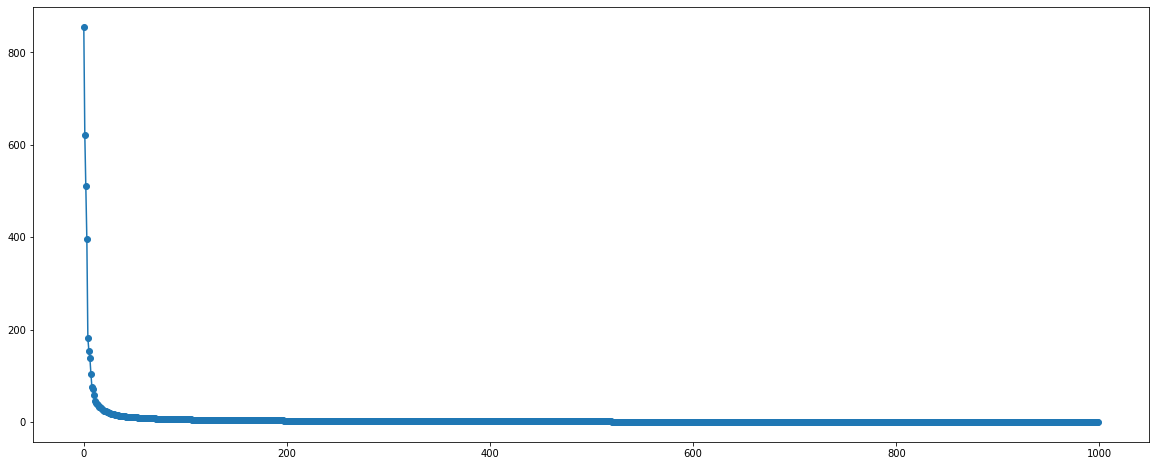

C:\Users\fredr\Miniconda3\envs\big_data\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


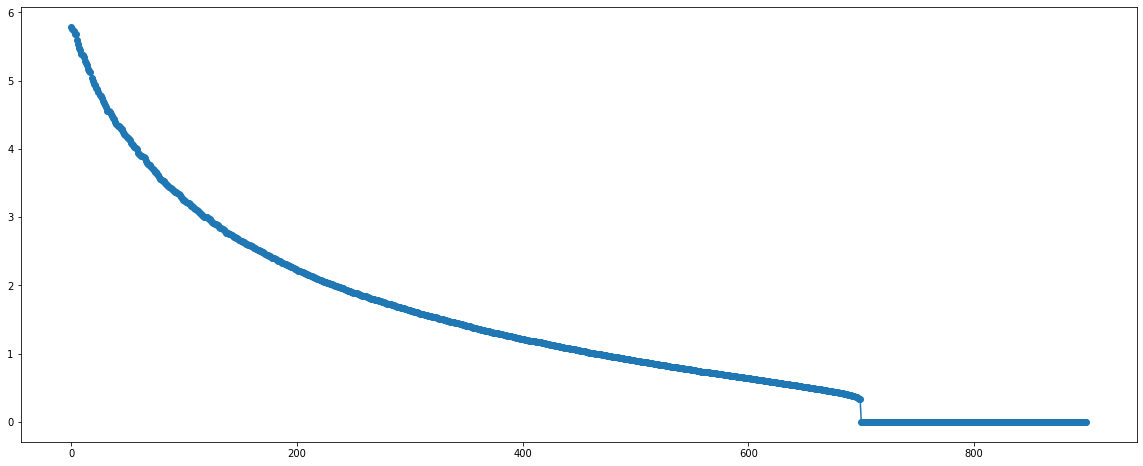

(0.3401982638624208+0j)
(1.640599471378144e-14+7.911956239442112e-15j)


In [126]:
plt.plot(w[0:1000],'-o')
plt.show()


plt.plot(w[100:1000],'-o')
plt.show()

print(w[799])
print(w[800])
## It seems like all eigenvalues after the first 800 are 0

In [154]:
## discard all PCs after the first 800

w = w[0:800]
v = old_v[:,0:800]





In [155]:

print(v.shape)
print(v[:,].shape)

print(data_reduced.shape)
#data_reduced = data_new_standardized[]

(800, 800)
(800, 800)
(801, 5579)


In [132]:

##Pickling a bit for david

import pickle

with open('eigenvalues_first_800.pkl', 'wb') as save_file:
    pickle.dump(w, save_file, -1)
    

with open('eigenvectors_first_800.pkl', 'wb') as save_file:
    pickle.dump(v, save_file, -1)

# Q1.2 - clustering #


In [134]:
from sklearn.cluster import KMeans





(800, 800)
(800,)
